<a href="https://colab.research.google.com/github/ormorteey/BST-222-Survival-Analysis/blob/main/BST_222_Midterm_Project_%5BExploratory_Data_Analysis%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
install.packages("pacman")
library(pacman)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
p_load(tidyverse, googledrive, KMsurv, survival, survminer, ggplot2, DescTools)

In [ ]:
require(KMsurv)
require(survival)
data(burn)
burn1 <- burn
burn1 <- data.frame(burn1,Treatment=factor(burn1$Z1,
labels=c("Routine","Cleansing")))
burn1 <- data.frame(burn1,Gender=factor(burn1$Z2,
labels=c("Male","Female")))
burn1 <- data.frame(burn1,Race=factor(burn1$Z3,
labels=c("Nonwhite","White")))
burn1 <- data.frame(burn1,PercentBurned=burn1$Z4)
burn1 <- data.frame(burn1,SiteHead=factor(burn1$Z5,
labels=c("NotBurned","Burned")))
burn1 <- data.frame(burn1,SiteButtock=factor(burn1$Z6,
labels=c("NotBurned","Burned")))
burn1 <- data.frame(burn1,SiteTrunk=factor(burn1$Z7,
labels=c("NotBurned","Burned")))

In [ ]:
head(burn1)

,Obs,Z1,Z2,Z3,Z4,Z5,Z6,Z7,Z8,Z9,⋯,D2,T3,D3,Treatment,Gender,Race,PercentBurned,SiteHead,SiteButtock,SiteTrunk
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<fct>,<fct>,<fct>,<int>,<fct>,<fct>,<fct>
1,1,0,0,0,15,0,0,1,1,0,⋯,0,12,0,Routine,Male,Nonwhite,15,NotBurned,NotBurned,Burned
2,2,0,0,1,20,0,0,1,0,0,⋯,0,9,0,Routine,Male,White,20,NotBurned,NotBurned,Burned
3,3,0,0,1,15,0,0,0,1,1,⋯,0,7,1,Routine,Male,White,15,NotBurned,NotBurned,NotBurned
4,4,0,0,0,20,1,0,1,0,0,⋯,0,29,0,Routine,Male,Nonwhite,20,Burned,NotBurned,Burned
5,5,0,0,1,70,1,1,1,1,0,⋯,0,4,1,Routine,Male,White,70,Burned,Burned,Burned
6,6,0,0,1,20,1,0,1,0,0,⋯,0,8,1,Routine,Male,White,20,Burned,NotBurned,Burned


In [ ]:
burn1 <- data.frame(burn1,SiteUpperLeg=factor(burn1$Z8,
labels=c("NotBurned","Burned")))
burn1 <- data.frame(burn1,SiteLowerLeg=factor(burn1$Z9,
labels=c("NotBurned","Burned")))
burn1 <- data.frame(burn1,SiteRespTract=factor(burn1$Z10,
labels=c("NotBurned","Burned")))
burn1 <- data.frame(burn1,BurnType=factor(burn1$Z11,
labels=c("Chemical","Scald","Electric","Flame")))

drop <- c("Z1",  "Z2",  "Z3",  "Z4",  "Z5",  "Z6",  "Z7",  "Z8",  "Z9",  "Z10", "Z11")
burn1_backup = burn1
burn1 <- burn1[,!names(burn1) %in% drop]


In [ ]:

# freq function

freq = function(var, name = deparse(substitute(var))){
tbl = table( var)
freq_tbl = tbl %>% as.data.frame()
prop_tbl = as.data.frame(prop.table(tbl) * 100) %>% as.data.frame() %>% select(Freq) %>% rename( Percentage = Freq)
total = data.frame(var = "Total", Freq = sum(freq_tbl$Freq), Percentage = sum(prop_tbl$`% Freq`))
df = cbind(freq_tbl, prop_tbl)
colnames(total) = colnames(df)
# df = rbind(df,total)
xname = c(name, colnames(df)[2:length(colnames(df))])
colnames(df) = xname
  return(df)
}

# ctable function

ctable_fn = function( x, y  ){

tbl = table( x, y) %>% as.data.frame.matrix()
prop_tbl = prop.table(tbl) 
tbl %<>% cbind(.,Total = rowSums(.)) %>% rbind(.,Total = colSums(.))
prop_tbl %<>% cbind(.,Total = rowSums(.)) %>% rbind(.,Total = colSums(.))
prop_tbl =  (prop_tbl * 100) %>% round(2)
break_point = dim(tbl)[2]
for(i in 1: dim(tbl)[2]){
  tbl[,i] = paste0(tbl[,i], " [ " , prop_tbl[,i],  "% ]" )
}
return(tbl)

}


num_summary = function(df){

  ## provide summary of the numerical variables
res = df %>% 
  select_if(is.numeric) %>% 
  gather(variables, value)%>%
  group_by(variables) %>%
  summarise(Count = n(), Mean = mean(value, na.rm=TRUE), Min = quantile(value, 0, na.rm=TRUE), Q1 = quantile(value, 0.25, na.rm=TRUE), 
  Q2 = quantile(value, 0.5, na.rm=TRUE),  Q3 = quantile(value, 0.75, na.rm=TRUE), Max = quantile(value, 1, na.rm=TRUE),
   Sd = sd(value, na.rm=TRUE), .groups = 'drop') 

return(res)
}


Warning message:
“Ignoring unknown parameters: fontface”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



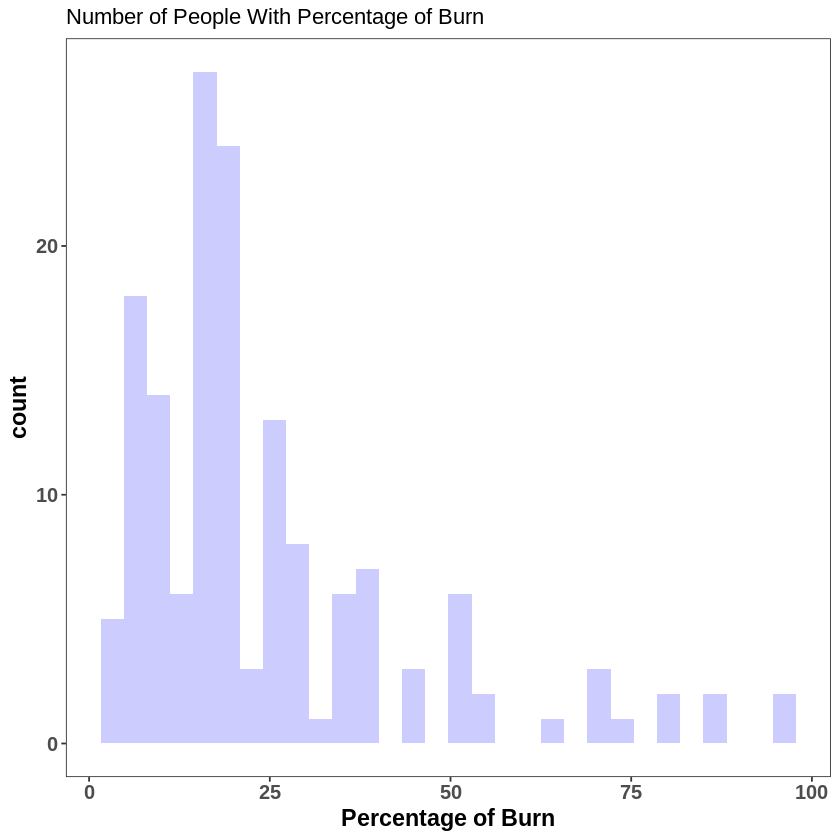

In [ ]:
burn1 %>% ggplot(aes(x = PercentBurned)) + 
geom_histogram(fontface = "bold", size = 5, alpha = 0.2, fill = "blue")+
            theme_minimal(base_size = 18)+
            labs(x = "Percentage of Burn", title = "Number of People With Percentage of Burn") +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))


 

In [ ]:
burn1 %>% select(-c('Treatment')) %>% select_if(is.factor) %>% map(~with(burn1,ctable_fn(., burn1$Treatment))) 

,Routine,Cleansing,Total
,<chr>,<chr>,<chr>
Male,54 [ 35.06% ],66 [ 42.86% ],120 [ 77.92% ]
Female,16 [ 10.39% ],18 [ 11.69% ],34 [ 22.08% ]
Total,70 [ 45.45% ],84 [ 54.55% ],154 [ 100% ]
,Routine,Cleansing,Total
,<chr>,<chr>,<chr>
Nonwhite,9 [ 5.84% ],10 [ 6.49% ],19 [ 12.34% ]
White,61 [ 39.61% ],74 [ 48.05% ],135 [ 87.66% ]
Total,70 [ 45.45% ],84 [ 54.55% ],154 [ 100% ]
,Routine,Cleansing,Total


Warning message:
“Ignoring unknown parameters: fontface”


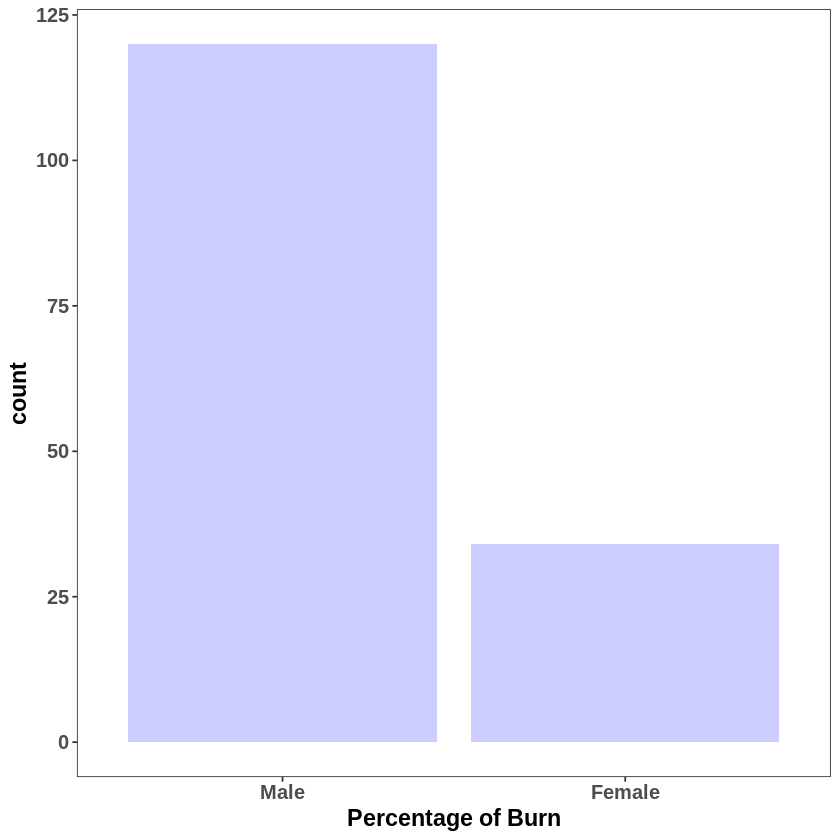

In [ ]:
burn1 %>% ggplot(aes(x = Gender)) + 
geom_bar(fontface = "bold", size = 5, alpha = 0.2, fill = "blue")+
            theme_minimal(base_size = 18)+
            labs(x = "Percentage of Burn") +
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))


 

Gender,Freq,Percentage,Lower_CI,Upper_CI
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Male,120,77.92,72.08,84.78
Female,34,22.08,16.23,28.93


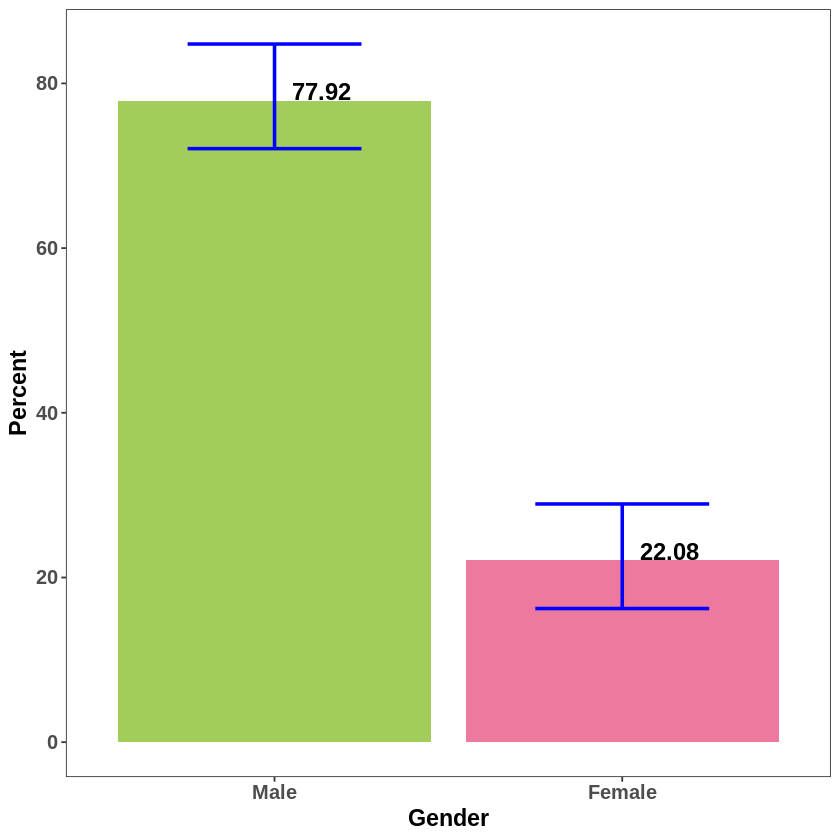

In [ ]:
observed = with(burn1, freq(Gender))
CI_limits = MultinomCI(observed$Freq,
           conf.level=0.95,
           method="sisonglaz") 
CI_limits = CI_limits[,-1] * 100
colnames(CI_limits) = c("Lower_CI", "Upper_CI")
observed = cbind(observed, CI_limits) 
observed$Freq = round(observed$Freq, 2)
observed$Percentage = round(observed$Percentage, 2)
observed$Lower_CI = round(observed$Lower_CI, 2)
observed$Upper_CI = round(observed$Upper_CI, 2)
observed

observed %>% ggplot(aes(x = Gender, y = Percentage)) + 
 geom_bar(fill = c("darkolivegreen3","palevioletred2"), position="dodge", stat="identity", width = 0.9) +
  labs(x = "Gender", y = "Percent") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5)+
            theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))


Race,Freq,Percentage,Lower_CI,Upper_CI
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Nonwhite,19,12.34,7.79,17.47
White,135,87.66,83.12,92.80


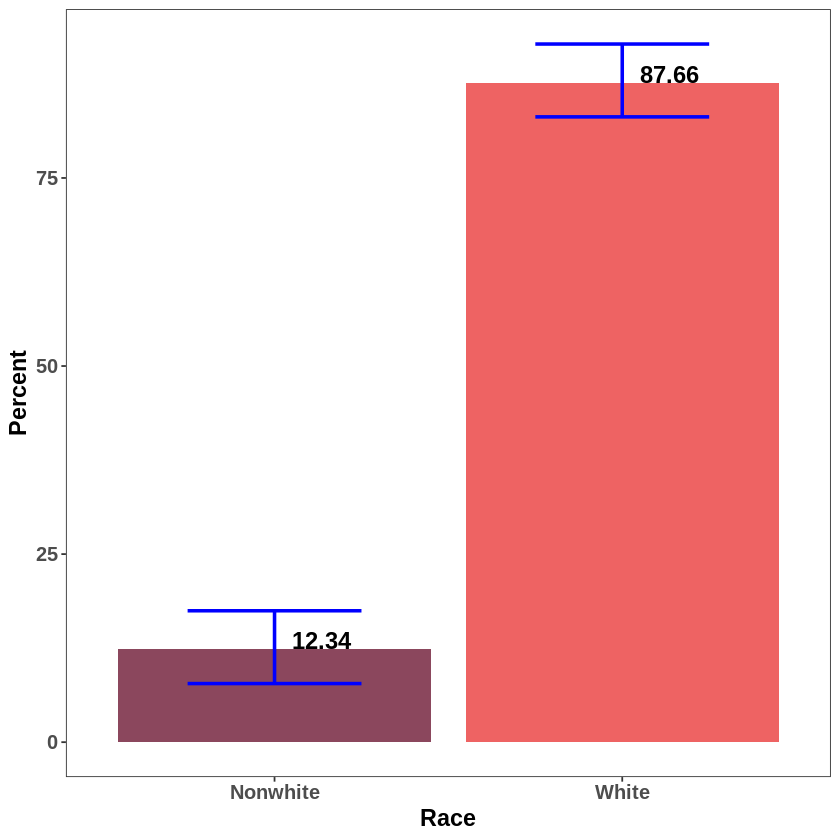

In [ ]:
observed = with(burn1, freq(Race))
CI_limits = MultinomCI(observed$Freq,
           conf.level=0.95,
           method="sisonglaz") 
CI_limits = CI_limits[,-1] * 100
colnames(CI_limits) = c("Lower_CI", "Upper_CI")
observed = cbind(observed, CI_limits) 
observed$Freq = round(observed$Freq, 2)
observed$Percentage = round(observed$Percentage, 2)
observed$Lower_CI = round(observed$Lower_CI, 2)
observed$Upper_CI = round(observed$Upper_CI, 2)
observed

observed %>% ggplot(aes(x = Race, y = Percentage)) + 
 geom_bar(fill = c("palevioletred4", "indianred2"), position="dodge", stat="identity", width = 0.9) +
  labs(x = "Race", y = "Percent") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5)+
            theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))


 

BurnType,Freq,Percentage,Lower_CI,Upper_CI
<fct>,<dbl>,<dbl>,<dbl>,<dbl>
Chemical,9,5.84,0.00,12.69
Scald,18,11.69,5.84,18.53
Electric,11,7.14,1.30,13.99
Flame,116,75.32,69.48,82.17


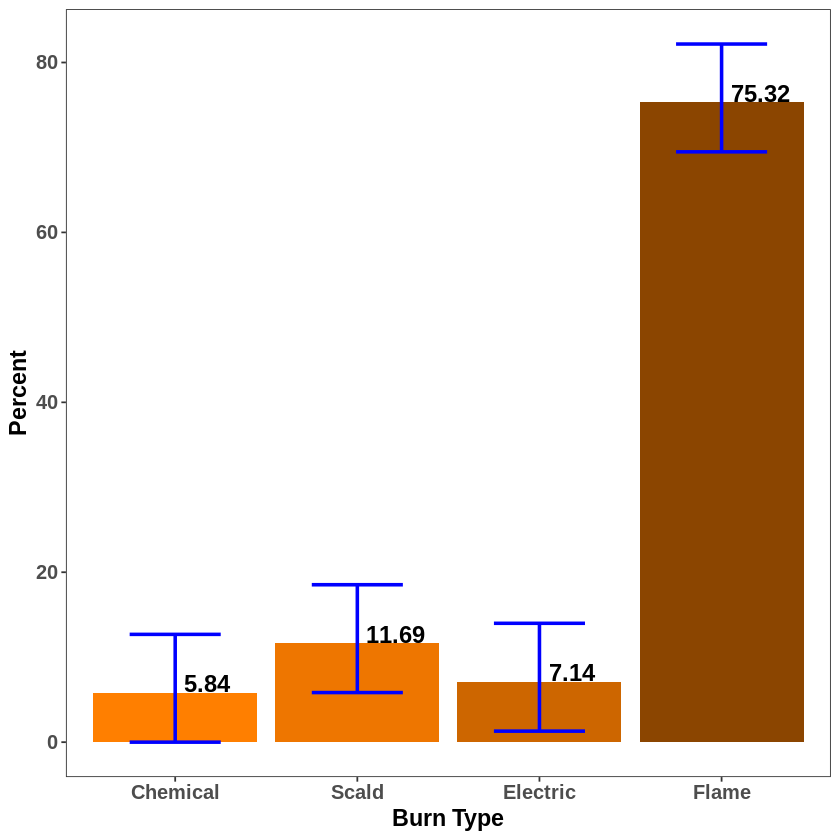

In [ ]:
observed = with(burn1, freq(BurnType))
CI_limits = MultinomCI(observed$Freq,
           conf.level=0.95,
           method="sisonglaz") 
CI_limits = CI_limits[,-1] * 100
colnames(CI_limits) = c("Lower_CI", "Upper_CI")
observed = cbind(observed, CI_limits) 
observed$Freq = round(observed$Freq, 2)
observed$Percentage = round(observed$Percentage, 2)
observed$Lower_CI = round(observed$Lower_CI, 2)
observed$Upper_CI = round(observed$Upper_CI, 2)
observed

observed %>% ggplot(aes(x = BurnType, y = Percentage)) + 
 geom_bar(fill = c("darkorange1", "darkorange2", "darkorange3", "darkorange4"), position="dodge", stat="identity", width = 0.9) +
  labs(x = "Burn Type", y = "Percent") +  
      geom_errorbar(aes(ymin = Lower_CI, ymax = Upper_CI), width = 0.5, position = position_dodge(width = 0.5), color = "blue", size = 1)    +
            geom_text(aes(label = Percentage), nudge_x = 0.05, nudge_y = 0.02,  vjust = 0, hjust = 0, fontface = "bold", size = 5)+
            theme_minimal(base_size = 18)+
  theme_bw() +
  theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank())+
  theme(legend.text=element_text(size=12 ,face="bold"), legend.title=element_text(size=12 ,face="bold"), axis.text=element_text(size=12 ,face="bold"),
        axis.title=element_text(size=14,face="bold"))


 

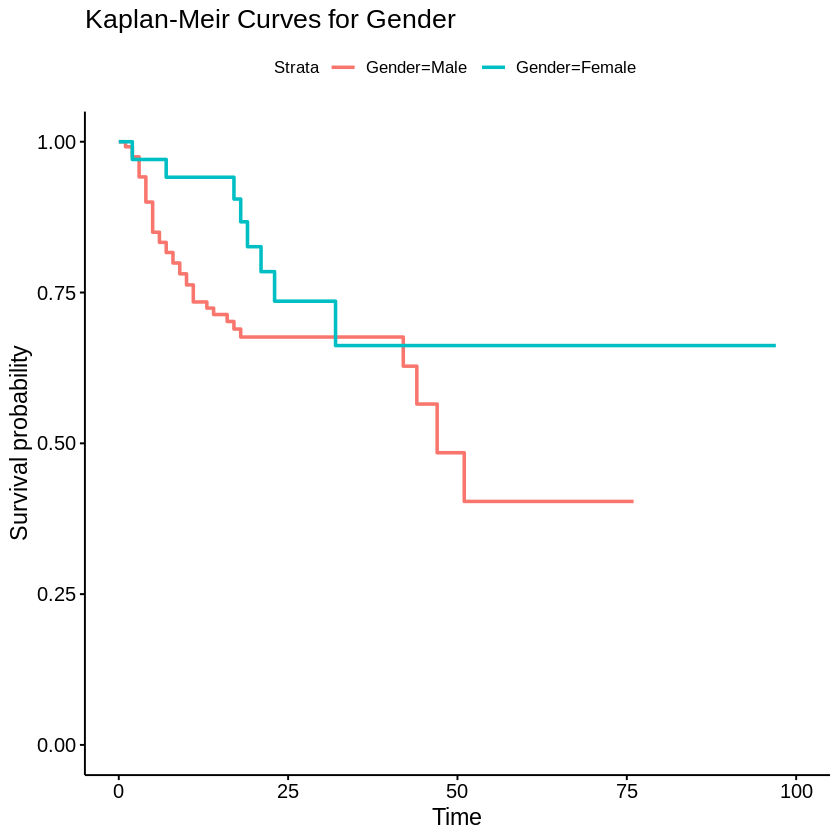

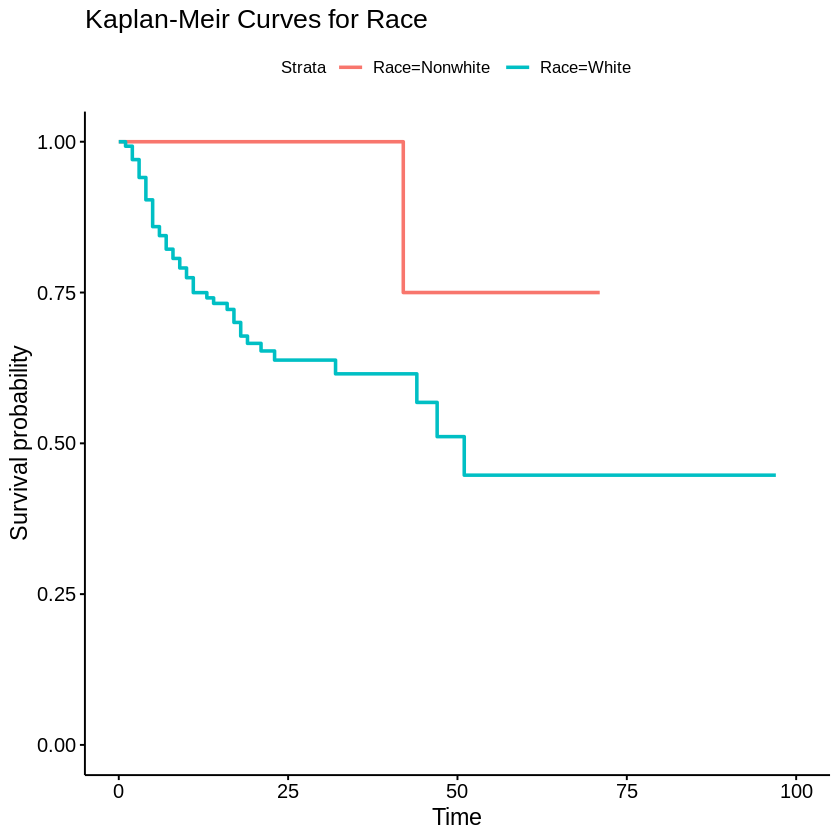

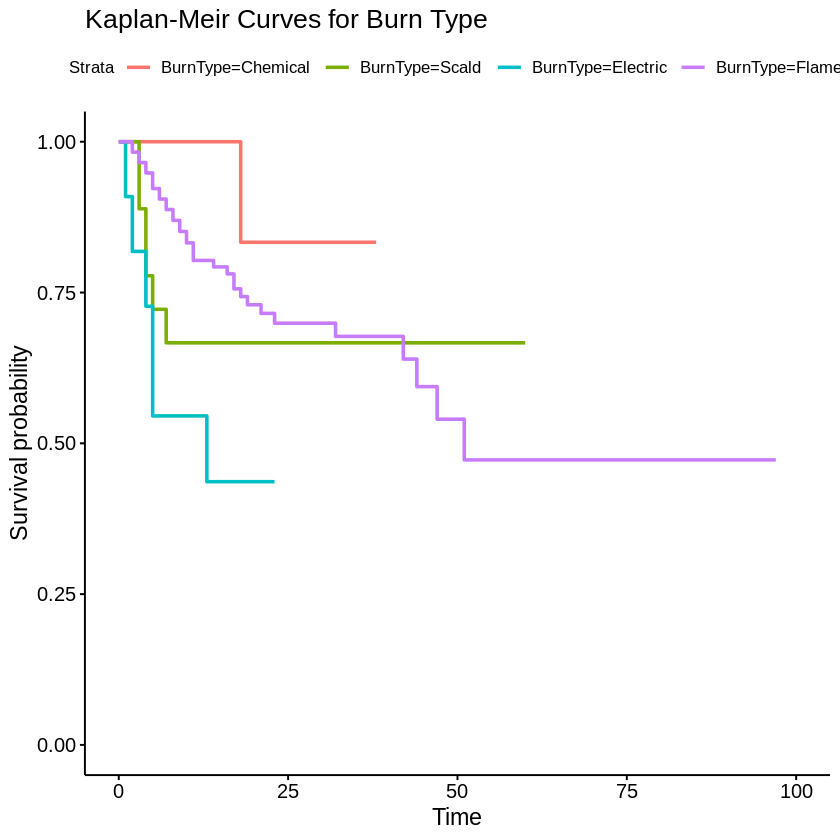

In [ ]:
burn1.surv <- with(burn1,Surv(T3,D3))

KMcurves_Gender =  survfit(burn1.surv ~ Gender, data=burn1, conf.int = 0.95)

ggsurvplot(KMcurves_Gender, censor = FALSE, title = "Kaplan-Meir Curves for Gender")

KMcurves_Race =  survfit(burn1.surv ~ Race, data=burn1, conf.int = 0.95)

ggsurvplot(KMcurves_Race, censor = FALSE, title = "Kaplan-Meir Curves for Race")

KMcurves_BurnType =  survfit(burn1.surv ~ BurnType, data=burn1, conf.int = 0.95)

ggsurvplot(KMcurves_BurnType, censor = FALSE, title = "Kaplan-Meir Curves for Burn Type")

In [ ]:
survdiff(formula = burn1.surv ~ Gender, data = burn1)

Call:
survdiff(formula = burn1.surv ~ Gender, data = burn1)

                N Observed Expected (O-E)^2/E (O-E)^2/V
Gender=Male   120       40     35.4     0.608      2.36
Gender=Female  34        8     12.6     1.701      2.36

 Chisq= 2.4  on 1 degrees of freedom, p= 0.1 

In [ ]:
rmarkdown:::convert_ipynb("BST_222_Midterm_Project_[Exploratory_Data_Analysis].ipynb")